In [10]:
import tensorflow as tf
import numpy as np
import cv2
import matplotlib.pyplot as plt
import json
from matplotlib.pyplot import imshow
%matplotlib inline

In [11]:
img_height=256
img_width=256
#Network Parameters
n_input=img_height*img_width*3

batch_size=1

tf.reset_default_graph()
#tf graph input
x=tf.placeholder(tf.float32,[None,img_height,img_width,3])
y=tf.placeholder(tf.float32,[None,64,64,16])

In [12]:
wc0=tf.Variable(tf.random_normal([3,3,3,64]),name="wc0")
bc0=tf.Variable(tf.random_normal([64]),name="bc0")

wc1=tf.Variable(tf.random_normal([3,3,64,128]),name="wc1")
bc1=tf.Variable(tf.random_normal([128]),name="bc1")

hgw1_1=tf.Variable(tf.random_normal([1,1,128,256]),name="hgw1_1")
hgb1_1=tf.Variable(tf.random_normal([256]),name="hgb1_1")
hgw1_2=tf.Variable(tf.random_normal([3,3,256,256]),name="hgw1_2")
hgb1_2=tf.Variable(tf.random_normal([256]),name="hgb1_2")
hgw1_3=tf.Variable(tf.random_normal([1,1,256,256]),name="hgw1_3")
hgb1_3=tf.Variable(tf.random_normal([256]),name="hgb1_3")

hgw2_1=tf.Variable(tf.random_normal([1,1,256,256]),name="hgw2_1")
hgb2_1=tf.Variable(tf.random_normal([256]),name="hgb2_1")
hgw2_2=tf.Variable(tf.random_normal([3,3,256,256]),name="hgw2_2")
hgb2_2=tf.Variable(tf.random_normal([256]),name="hgb2_2")
hgw2_3=tf.Variable(tf.random_normal([1,1,256,256]),name="hgw2_3")
hgb2_3=tf.Variable(tf.random_normal([256]),name="hgb2_3")

hgw3_1=tf.Variable(tf.random_normal([1,1,256,256]),name="hgw3_1")
hgb3_1=tf.Variable(tf.random_normal([256]),name="hgb3_1")
hgw3_2=tf.Variable(tf.random_normal([3,3,256,256]),name="hgw3_2")
hgb3_2=tf.Variable(tf.random_normal([256]),name="hgb3_2")
hgw3_3=tf.Variable(tf.random_normal([1,1,256,256]),name="hgw3_3")
hgb3_3=tf.Variable(tf.random_normal([256]),name="hgb3_3")

hgw4_1=tf.Variable(tf.random_normal([1,1,256,256]),name="hgw4_1")
hgb4_1=tf.Variable(tf.random_normal([256]),name="hgb4_1")
hgw4_2=tf.Variable(tf.random_normal([3,3,256,256]),name="hgw4_2")
hgb4_2=tf.Variable(tf.random_normal([256]),name="hgb4_2")
hgw4_3=tf.Variable(tf.random_normal([1,1,256,256]),name="hgw4_3")
hgb4_3=tf.Variable(tf.random_normal([256]),name="hgb4_3")

hgw5_1=tf.Variable(tf.random_normal([1,1,256,256]),name="hgw5_1")
hgb5_1=tf.Variable(tf.random_normal([256]),name="hgb5_1")
hgw5_2=tf.Variable(tf.random_normal([3,3,256,256]),name="hgw5_2")
hgb5_2=tf.Variable(tf.random_normal([256]),name="hgb5_2")
hgw5_3=tf.Variable(tf.random_normal([1,1,256,256]),name="hgw5_3")
hgb5_3=tf.Variable(tf.random_normal([256]),name="hgb5_3")

hgw7=tf.Variable(tf.random_normal([3,3,256,128]),name="hgw7")
hgb7=tf.Variable(tf.random_normal([128]),name="hgb7")

brhgw4_1=tf.Variable(tf.random_normal([1,1,256,256]),name="brhgw4_1")
brhgb4_1=tf.Variable(tf.random_normal([256]),name="brhgb4_1")
brhgw4_2=tf.Variable(tf.random_normal([3,3,256,256]),name="brhgw4_2")
brhgb4_2=tf.Variable(tf.random_normal([256]),name="brhgb4_2")
brhgw4_3=tf.Variable(tf.random_normal([1,1,256,128]),name="brhgw4_3")
brhgb4_3=tf.Variable(tf.random_normal([128]),name="brhgb4_3")

hgw9=tf.Variable(tf.random_normal([3,3,128,64]),name="hgw9")
hgb9=tf.Variable(tf.random_normal([64]),name="hgb9")

brhgw3_1=tf.Variable(tf.random_normal([1,1,256,256]),name="brhgw3_1")
brhgb3_1=tf.Variable(tf.random_normal([256]),name="brhgb3_1")
brhgw3_2=tf.Variable(tf.random_normal([3,3,256,256]),name="brhgw3_2")
brhgb3_2=tf.Variable(tf.random_normal([256]),name="brhgb3_2")
brhgw3_3=tf.Variable(tf.random_normal([1,1,256,64]),name="brhgw3_3")
brhgb3_3=tf.Variable(tf.random_normal([64]),name="brhgb3_3")

hgw11=tf.Variable(tf.random_normal([3,3,64,32]),name="hgw11")
hgb11=tf.Variable(tf.random_normal([32]),name="hgb11")

brhgw2_1=tf.Variable(tf.random_normal([1,1,256,256]),name="brhgw2_1")
brhgb2_1=tf.Variable(tf.random_normal([256]),name="brhgb2_1")
brhgw2_2=tf.Variable(tf.random_normal([3,3,256,256]),name="brhgw2_2")
brhgb2_2=tf.Variable(tf.random_normal([256]),name="brhgb2_2")
brhgw2_3=tf.Variable(tf.random_normal([1,1,256,32]),name="brhgw2_3")
brhgb2_3=tf.Variable(tf.random_normal([32]),name="brhgb2_3")

hgw13=tf.Variable(tf.random_normal([3,3,32,16]),name="hgw13")
hgb13=tf.Variable(tf.random_normal([16]),name="hgb13")

brhgw1_1=tf.Variable(tf.random_normal([1,1,256,256]),name="brhgw1_1")
brhgb1_1=tf.Variable(tf.random_normal([256]),name="brhgb1_1")
brhgw1_2=tf.Variable(tf.random_normal([3,3,256,256]),name="brhgw1_2")
brhgb1_2=tf.Variable(tf.random_normal([256]),name="brhgb1_2")
brhgw1_3=tf.Variable(tf.random_normal([1,1,256,16]),name="brhgw1_3")
brhgb1_3=tf.Variable(tf.random_normal([16]),name="brhgb1_3")


wc2=tf.Variable(tf.random_normal([1,1,16,16]),name="wc2")
bc2=tf.Variable(tf.random_normal([16]),name="bc2")

wc3=tf.Variable(tf.random_normal([1,1,16,16]),name="wc3")
bc3=tf.Variable(tf.random_normal([16]),name="bc3")

In [13]:
def conv2d(img,w,b):
    return tf.nn.relu(tf.nn.bias_add(tf.nn.conv2d(img,w,strides=[1,1,1,1],padding='SAME'),b))
def max_pool(img,k):
    return tf.nn.max_pool(img,ksize=[1,k,k,1],strides=[1,k,k,1],padding='SAME')
def cv_bottleneck(img,w1,b1,w2,b2,w3,b3):
    tmp_bn_1=conv2d(img,w1,b1)
    tmp_bn_2=conv2d(tmp_bn_1,w2,b2)
    tmp_bn_3=conv2d(tmp_bn_2,w3,b3)
    return tmp_bn_3

In [14]:
#Construct model
x=x/255.0
conv0=conv2d(x,wc0,bc0)
conv0_pooling=max_pool(conv0,k=2)        #128


conv1=conv2d(conv0_pooling,wc1,bc1)
conv1_pooling=max_pool(conv1,k=2)      #64


hg_cv_1=cv_bottleneck(conv1_pooling,hgw1_1,hgb1_1,hgw1_2,hgb1_2,hgw1_3,hgb1_3)
hg_cv_1_pooling=max_pool(hg_cv_1,k=2) #32

    
hg_cv_2=cv_bottleneck(hg_cv_1_pooling,hgw2_1,hgb2_1,hgw2_2,hgb2_2,hgw2_3,hgb2_3)
hg_cv_2_pooling=max_pool(hg_cv_2,k=2) #16


hg_cv_3=cv_bottleneck(hg_cv_2_pooling,hgw3_1,hgb3_1,hgw3_2,hgb3_2,hgw3_3,hgb3_3)
hg_cv_3_pooling=max_pool(hg_cv_3,k=2) #8


hg_cv_4=cv_bottleneck(hg_cv_3_pooling,hgw4_1,hgb4_1,hgw4_2,hgb4_2,hgw4_3,hgb4_3)
hg_cv_4_pooling=max_pool(hg_cv_4,k=2) #4


hg_cv_5=cv_bottleneck(hg_cv_4_pooling,hgw5_1,hgb5_1,hgw5_2,hgb5_2,hgw5_3,hgb5_3)


hg_cv_7=conv2d(hg_cv_5,hgw7,hgb7)

hg_cv_8=tf.image.resize_bilinear(hg_cv_7,hg_cv_4.get_shape().as_list()[1:3])   #8
brhg_cv_4=cv_bottleneck(hg_cv_4,brhgw4_1,brhgb4_1,brhgw4_2,brhgb4_2,brhgw4_3,brhgb4_3)
hg_add_1=tf.add(hg_cv_8,brhg_cv_4)


hg_cv_9=conv2d(hg_add_1,hgw9,hgb9)

hg_cv_10=tf.image.resize_bilinear(hg_cv_9,hg_cv_3.get_shape().as_list()[1:3])   #16
brhg_cv_3=cv_bottleneck(hg_cv_3,brhgw3_1,brhgb3_1,brhgw3_2,brhgb3_2,brhgw3_3,brhgb3_3)
hg_add_2=tf.add(hg_cv_10,brhg_cv_3)


hg_cv_11=conv2d(hg_add_2,hgw11,hgb11)

hg_cv_12=tf.image.resize_bilinear(hg_cv_11,hg_cv_2.get_shape().as_list()[1:3])   #32
brhg_cv_2=cv_bottleneck(hg_cv_2,brhgw2_1,brhgb2_1,brhgw2_2,brhgb2_2,brhgw2_3,brhgb2_3)
hg_add_3=tf.add(hg_cv_12,brhg_cv_2)


hg_cv_13=conv2d(hg_add_3,hgw13,hgb13)

hg_cv_14=tf.image.resize_bilinear(hg_cv_13,hg_cv_1.get_shape().as_list()[1:3])   #32
brhg_cv_1=cv_bottleneck(hg_cv_1,brhgw1_1,brhgb1_1,brhgw1_2,brhgb1_2,brhgw1_3,brhgb1_3)
hg_add_4=tf.add(hg_cv_14,brhg_cv_1)



conv2=conv2d(hg_add_4,wc2,bc2)

conv3=conv2d(conv2,wc3,bc3)

loss_h=[]

for tmp in range(0,16):
    b_2=tf.log(tf.add(tf.abs(tf.subtract(1.0,conv3[:,:,:,tmp])),0.00000001))
    checkb=tf.check_numerics(b_2,"b_2")
    b_1=tf.subtract(1.0,y[:,:,:,tmp])
    b=tf.multiply(b_1,b_2)
    
    a_2=tf.log(tf.add(tf.abs(conv3[:,:,:,tmp]),0.00000001))
    checka=tf.check_numerics(a_2,"s_2")
    a_1=y[:,:,:,tmp]
    a=tf.multiply(a_1,a_2)
    c=tf.add(a,b)
    loss_h.append(tf.reduce_sum(c))
    
cost=tf.reduce_mean(loss_h)/batch_size


In [15]:
now_at=50
def draw_Gaussian_distribution(centerX,centerY,img_w,img_h,amplitude=1,stdx=15,stdy=15):
    stdx=stdx^2
    stdy=stdy^2
    x,y = np.meshgrid(np.linspace(0,img_w,img_w), np.linspace(0,img_h,img_h))
    x=x-centerX
    y=y-centerY
    x=x*x
    y=y*y
    x=x/(2*stdx)
    y=y/(2*stdy)
    combine=(x+y)*(-1)
    final=amplitude-amplitude*np.exp(combine)
    return final
def x_next_batch(img_dir_path='',index_path='',img_height=480,img_width=360,batch_size=10,now_at=0):
    X=np.empty([batch_size,img_height,img_width,3])
    raw_datas= open(index_path).readlines()
    for i in range(0,batch_size):
        data=json.loads(raw_datas[now_at+i].strip())
        img_name=data['filename']
        img=cv2.imread(img_dir_path+img_name)
        X[i]=np.array(img)
    return X
def y_next_batch(img_dir_path='',index_path='',img_height=480,img_width=360,batch_size=10,now_at=0):
    Y=np.empty([batch_size,img_height,img_width,16])
    raw_datas= open(index_path).readlines()
    for i in range(0,batch_size):
        data=json.loads(raw_datas[now_at+i].strip())
        list_heatmaps=[]
        joints_pos=data['joint_pos']
        for j,joint in zip(range(0,len(joints_pos)),joints_pos):
            x=int(joints_pos[str(joint)][0])
            y=int(joints_pos[str(joint)][1])
            list_heatmaps.append(draw_Gaussian_distribution(x,y,img_w=img_width,img_h=img_height))
        numpy_heatmaps=np.array(cv2.merge(list_heatmaps[:]))
        Y[i]=numpy_heatmaps
    return Y

In [16]:
saver = tf.train.Saver()
init=tf.global_variables_initializer()
config = tf.ConfigProto()
config.gpu_options.allow_growth = True

In [17]:
pairs=[[7,8],[8,9],[6,5],[5,4],[6,0],[7,0],[0,1],[1,2],[2,3],[10,11],[11,12],[15,14],[14,13],[12,1],[13,1]]
def draw_bones(img,joints):
    for line in pairs:
        a=(int(joints[line[0]][0]),int(joints_pos[line[0]][1]))
        b=(int(joints[line[1]][0]),int(joints_pos[line[1]][1]))
        cv2.line(img,a,b,(255,0,0),1)
    return img

INFO:tensorflow:Restoring parameters from model/model_hg_16.ckpt
Minibatch Loss=-42002.656250


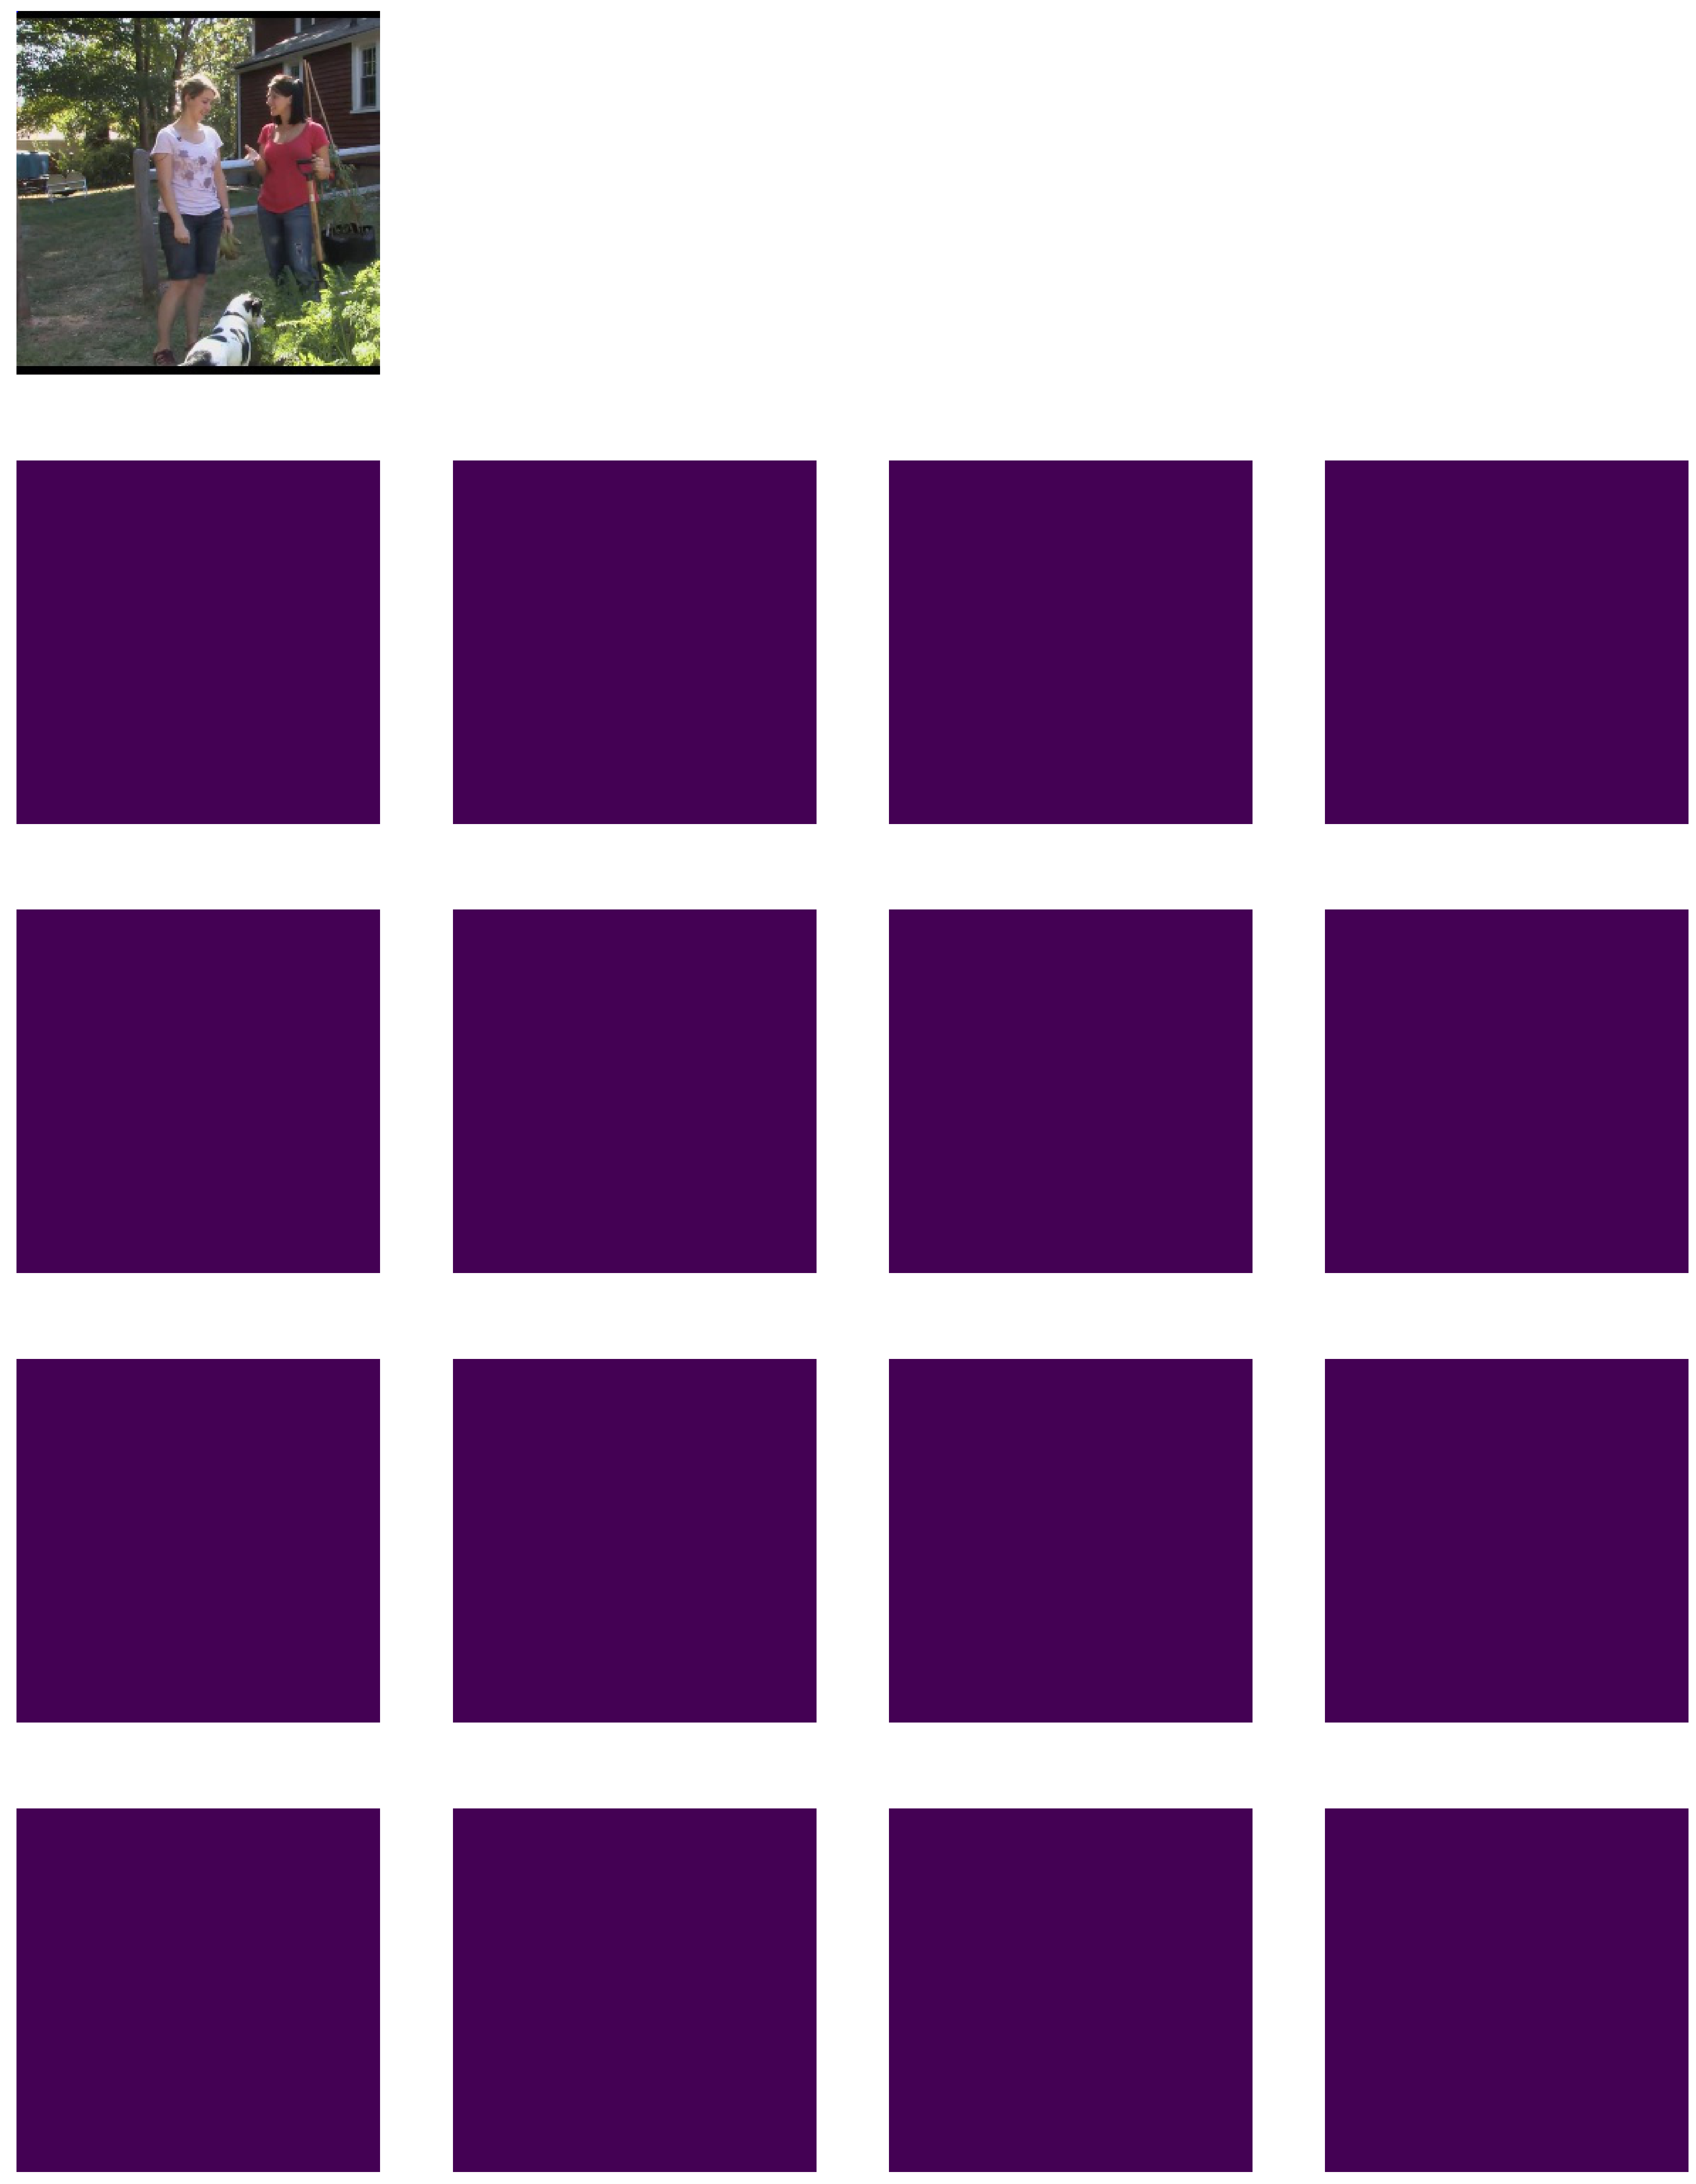

In [18]:
with tf.Session(config=config) as sess:
    sess.run(init)
    saver.restore(sess,"model/model_hg_16.ckpt")
    X=x_next_batch(
                    img_dir_path='mpii_human_pose_v1\\output_images256x256\\',
                    index_path='train_data\\new_data_100x200.json',
                    img_height=img_height,img_width=img_width,
                    batch_size=batch_size,now_at=now_at)
    Y=y_next_batch(
                    img_dir_path='mpii_human_pose_v1\\output_images256x256\\',
                    index_path='train_data\\new_data_64x64.json',
                    img_height=64,img_width=64,
                    batch_size=batch_size,now_at=now_at)
    X_cv2=X[0].astype(np.uint8)
    output=sess.run([conv3,cost],feed_dict = {x:X,y:Y})   
    print("Minibatch Loss="+"{:.6f}".format(output[1]))
    joints_pos=np.zeros([16,2])
    gm_img_set=[]
    for i in range(0,16):
        tmp_heatmap=output[0][0,:,:,i]
        gm_img_set.append(tmp_heatmap)
        single_joint_location = np.unravel_index(tmp_heatmap.argmax(), tmp_heatmap.shape)
        joints_pos[i]=single_joint_location
        joints_pos[i]=joints_pos[i]/64*256
    X_cv2=draw_bones(X_cv2,joints_pos)

fig, axes=plt.subplots(5,4,figsize=(60,80))
times=0
gm_count=0
for ax in axes.flat:
    ax.axis("off")
    if times==0:
        ax.imshow(cv2.cvtColor(X_cv2, cv2.COLOR_RGB2BGR))
    if times>3:
        ax.imshow(gm_img_set[gm_count],interpolation='lanczos')
        gm_count+=1
    times+=1
plt.show()
#cv2.imshow('frame',img)
#cap.release()
#cv2.destroyAllWindows()